--2021-06-23 09:18:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  4.99MB/s    in 65s     

2021-06-23 09:19:22 (4.75 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]

jumlah total gambar gunting:  750
jumlah total gambar kertas:  712
jumlah total gambar batu:  726
nampilin nama file
gunting:  ['PnuPFf14FGLB9AKu.png', 'FFGftZrGnvN8rRqN.png', 'M5u2FmtXKSMtK8yN.png', 'R9GlL5dx9nmjXWlS.png', 'KYTLHLPHUqj58UVh.png']
kertas:  ['FKhLHIIqEsYmoZxy.png', 'HTETrKtTEB31pvsK.png', 'W79peyAyfQqNP1vF.png', '1jHtb93pI8f6

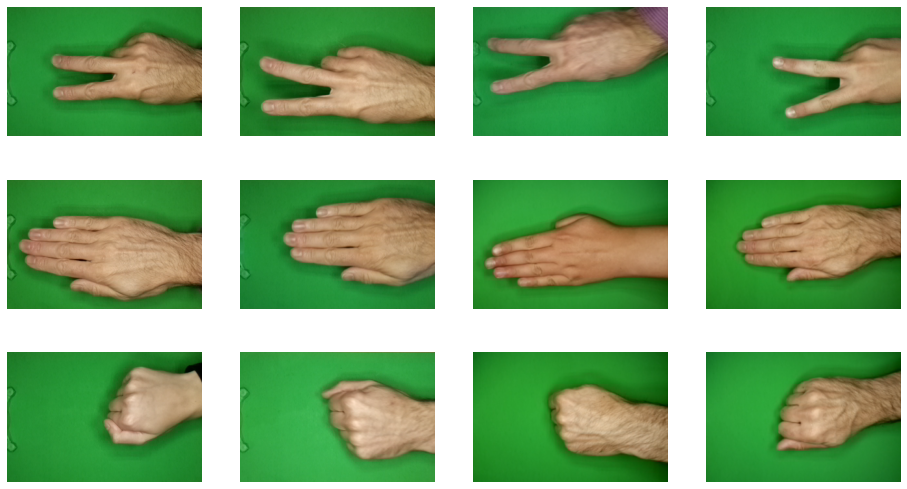

In [3]:
import tensorflow as tf
import zipfile,os
import os


!wget --no-check-certificate \
 https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

#melakukan eksraksi pada file zip

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


fold_gunting = os.path.join('/tmp/rockpaperscissors/scissors')
fold_batu = os.path.join('/tmp/rockpaperscissors/rock')
fold_kertas = os.path.join('/tmp/rockpaperscissors/paper')

print('jumlah total gambar gunting: ', len(os.listdir(fold_gunting)))
print('jumlah total gambar kertas: ', len(os.listdir(fold_kertas)))
print('jumlah total gambar batu: ', len(os.listdir(fold_batu)))

print('nampilin nama file')

file_gunting = os.listdir(fold_gunting)
print('gunting: ',file_gunting[:5])

file_kertas = os.listdir(fold_kertas)
print('kertas: ',file_kertas[:5])

file_batu = os.listdir(fold_batu)
print('batu: ',file_batu[:5])

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4,nrows * 3)

pic_index += 4
gbr_tampil_gunting = [os.path.join(fold_gunting, fname)
                      for fname in file_gunting[pic_index-4:pic_index]]


gbr_tampil_batu = [os.path.join(fold_batu, fname)
                      for fname in file_batu[pic_index-4:pic_index]]

gbr_tampil_kertas = [os.path.join(fold_kertas, fname)
                      for fname in file_kertas[pic_index-4:pic_index]]


for i, img_path in enumerate(gbr_tampil_gunting+gbr_tampil_kertas+gbr_tampil_batu):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()



In [4]:
#menggunakan image generator

import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

**Membagi trainset dan validation set**

In [15]:
BASIS_DIR = "/tmp/rockpaperscissors/rps-cv-images"
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    #augmentasi
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'wrap',
    #memecah data menjadi data training dan data validasi
    validation_split=0.4
)

In [16]:
#pelebelan data menggunakan image data generator bedasarkan folder

train_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size = (150,150),
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size = (150,150),
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


**Membuat Model**

In [17]:
#membuat model jarigan saraf tiruan
#model yg digunakan = sequential

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3), activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(128,activation='relu'),

    tf.keras.layers.Dense(512,activation='relu'),

    tf.keras.layers.Dense(3,activation='softmax')

])
    
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9248)             

In [18]:
#melakukan kompilasi model

model.compile(loss = 'categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [20]:
history=model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2
)

Epoch 1/50
4/4 - 5s - loss: 0.4889 - accuracy: 0.7969 - val_loss: 0.4826 - val_accuracy: 0.8281
Epoch 2/50
4/4 - 5s - loss: 0.4703 - accuracy: 0.8125 - val_loss: 0.5720 - val_accuracy: 0.8438
Epoch 3/50
4/4 - 5s - loss: 0.6211 - accuracy: 0.8203 - val_loss: 0.7000 - val_accuracy: 0.6953
Epoch 4/50
4/4 - 5s - loss: 0.4941 - accuracy: 0.7891 - val_loss: 0.3595 - val_accuracy: 0.8438
Epoch 5/50
4/4 - 5s - loss: 0.5298 - accuracy: 0.7812 - val_loss: 0.4293 - val_accuracy: 0.8594
Epoch 6/50
4/4 - 5s - loss: 0.3981 - accuracy: 0.8750 - val_loss: 0.3457 - val_accuracy: 0.9062
Epoch 7/50
4/4 - 5s - loss: 0.4328 - accuracy: 0.8359 - val_loss: 0.3198 - val_accuracy: 0.8750
Epoch 8/50
4/4 - 5s - loss: 0.4466 - accuracy: 0.8281 - val_loss: 0.3918 - val_accuracy: 0.8750
Epoch 9/50
4/4 - 5s - loss: 0.4280 - accuracy: 0.8359 - val_loss: 0.4394 - val_accuracy: 0.8281
Epoch 10/50
4/4 - 5s - loss: 0.3985 - accuracy: 0.8281 - val_loss: 0.4729 - val_accuracy: 0.8047
Epoch 11/50
4/4 - 5s - loss: 0.5113 - a

**melihat akurasi dengan grafik**

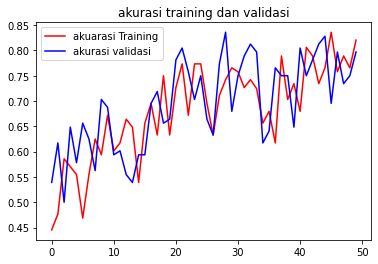

<Figure size 432x288 with 0 Axes>

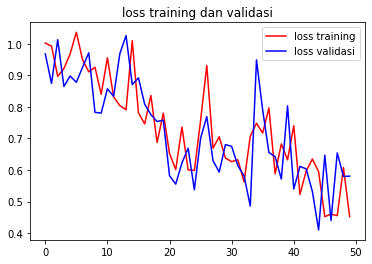

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'akuarasi Training')
plt.plot(epochs, val_acc,'b',label='akurasi validasi')
plt.title('akurasi training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'loss training')
plt.plot(epochs, val_loss,'b',label='loss validasi')
plt.title('loss training dan validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

**Mengecek Gambar**

Saving Zz52yCODsLplv7rK.png to Zz52yCODsLplv7rK (1).png
Zz52yCODsLplv7rK.png
batu


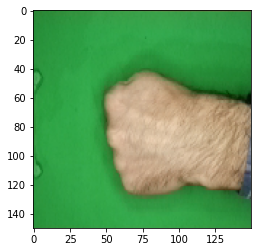

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('kertas')
  elif classes[0][1]==1:
    print('batu')
  elif classes[0][2]==1:
    print('gunting')
  else:
    print('gak tau')

Muhammad zaim mustaqim
zaimmustaqiem16@gmail.com
